# Réseaux plans et Polyèdres

In [1]:
import ccad.model as cm 

import reversy.pointcloud as pc
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from OCC.Display.WebGl import jupyter_renderer
import ccad.planarnet as pn
%matplotlib inline

Le module **planarnet** est une extension de **ccad.model** destiné à faciliter la construction des polyèdres à partir de leur représentation par [un réseau plan](http://mathworld.wolfram.com/Net.html) .
*La [conjecture de Shephard](http://mathworld.wolfram.com/ShephardsConjecture.html)
suggère que tout polyhèdre convexe admet un telle représentation plane sans recouvrement*.  


Le module **planarnet** permet de paver le plan avec des polygones, et de maintenir un graphe associé dont les noeuds sont les faces du polyèdre et les arètes des connexions entre faces auxquelles sont associées une valeur angulaire de pliage :  **angle**. 


Ce notebook illustre comment cette classe permet de générer des polygones réguliers en peu d'instructions et en indiquant le procédé de construction sous-jacent. En ce sens, il est l'analogue de ce que l'on souhaite réaliser dans [**osvcad**](https://github.com/osv-team/osvcad) à un niveau supérieur avec des **graphes de solides et d'assemblages** constituant un assemblage. 

![BRUCKNER1900](http://seeingscience.umbc.edu/wp-content/uploads/2017/01/BRUCKNER-2.jpg)

# Le tétraèdre

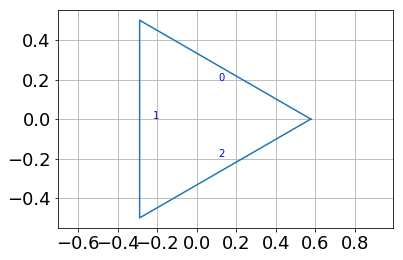

In [2]:
tetranet = pn.PlanarNet(N=3,l=1)
tetranet.plot()   

A ce stade, le graphe ne possède qu'un noeud et aucune arète

In [3]:
print(tetranet.nodes())
print(tetranet.edges())

[0]
[]



On réplique ensuite la forme du triangle équilatéral sur chaque arète du triangle 0 à l'aide de la méthode **expand**. 


La fonction **expand** permet de sélectionner une arète **iedge** d'une face **iface** et de lui accoller un polyhèdre régulier de **nedges** côtés. A cette arète est associé un angle de pliage en radians et une orientation

On affecte à chaque arète la valeur angulaire en radians **angle** qui permettra le pliage en 3 dimensions associé au numéro de l'arête.

In [4]:
alpha = 2.185
tetranet.expand(0,0,4,sign=1,angle=alpha)

In [5]:
tetranet

PlanarNet :2
Area : 0.433   Center : -0.000, 0.000 , 0.000
Area : 1.000   Center : 0.394, 0.683 , 0.000

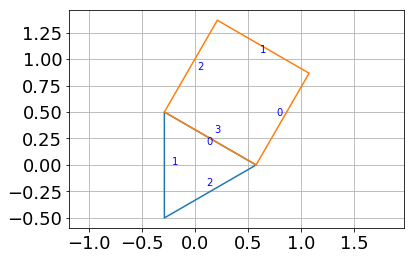

In [6]:
tetranet.plot()   

In [7]:
tetranet.expand(1,0,3,angle=alpha)
tetranet.expand(1,1,3,angle=alpha)
tetranet.expand(1,2,3,angle=alpha)

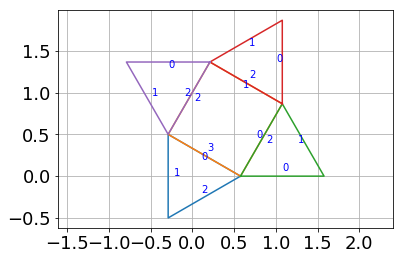

In [8]:
tetranet.plot()

In [9]:
tetranet.edges()

EdgeView([(0, 1), (1, 2), (1, 3), (1, 4)])

**iedge** est l'arète interne de la facette lhs. Ce graphe possède 4 arètes de pliage. La première face (0) est un triangle et le pliage est selon son arète interne (0). La seconde arète est l'arète interne 1 de la face(1), puis l'arète 2 de la face(1) puis enfin l'arète (0) de la face (1).  

In [10]:
print(tetranet[0][1])
print(tetranet[1][3])
print(tetranet[1][4])
print(tetranet[1][2])

{'angle': 2.185, 'iedge': 0}
{'angle': 2.185, 'iedge': 1}
{'angle': 2.185, 'iedge': 2}
{'angle': 2.185, 'iedge': 0}


In [11]:
tetranet.lfaces

[Area : 0.433   Center : -0.000, 0.000 , 0.000,
 Area : 1.000   Center : 0.394, 0.683 , 0.000,
 Area : 0.433   Center : 1.077, 0.289 , 0.000,
 Area : 0.433   Center : 0.789, 1.366 , 0.000,
 Area : 0.433   Center : -0.289, 1.077 , 0.000]

In [12]:
tetranet.edges()

EdgeView([(0, 1), (1, 2), (1, 3), (1, 4)])

In [13]:
tetrasolid = tetranet.fold()

V 8
E 12
F 5
Euler check (2): V-E+F : 1
open shape


In [14]:
j = jupyter_renderer.JupyterRenderer()
j.DisplayShape(tetrasolid.shape,update=True)

In [14]:
tetranet = pn.PlanarNet(N=3,l=1)
alpha = np.pi - np.arccos(1/3.)
#alpha = np.pi/20
for k in range(3):
    tetranet.replicate(iedge=k, angle = alpha)

In [15]:
type(tetranet.lfaces[0])

ccad.model.Face

In [16]:
tetranet.edges()

EdgeView([(0, 1), (0, 2), (0, 3)])

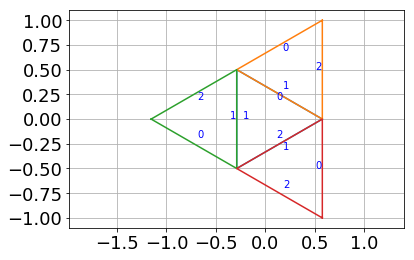

In [17]:
tetranet.plot()

In [18]:
tetrasolid = tetranet.fold()

V 4
E 6
F 4
Euler check (2): V-E+F : 2
closed shape


In [19]:
j = jupyter_renderer.JupyterRenderer()
j.DisplayShape(tetrasolid.shape,update=True)

# [Le dodécaèdre](http://mathworld.wolfram.com/Unfolding.html)

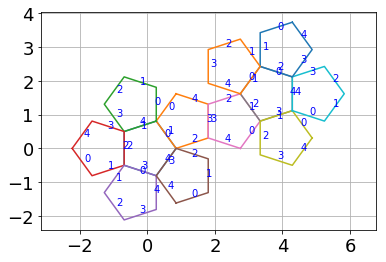

In [20]:
dodecanet = pn.PlanarNet(N=5,l=1)
alpha = np.arctan(2)
for k in range(5):
    dodecanet.replicate(iedge=k, angle = alpha)
dodecanet.replicate(iface=1,iedge=3,angle=alpha)
dodecanet.replicate(iface=6,iedge=1,angle=alpha)
for k in range(2,6):
    dodecanet.replicate(iface=7,iedge=(k+1)%5,angle=alpha)
dodecanet.plot()

In [21]:
dodecasolid = dodecanet.fold()

V 20
E 30
F 12
Euler check (2): V-E+F : 2
closed shape


In [22]:
j = jupyter_renderer.JupyterRenderer()
j.DisplayShape(dodecasolid.shape,update=True)

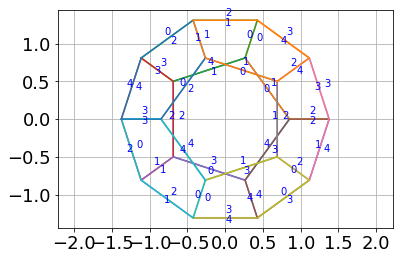

In [23]:
dodecanet.plot()

In [24]:
dodecanet

PlanarNet :12
Folded
Area : 1.720   Center : -0.000, -0.000 , 0.000
Area : 1.720   Center : 0.806, 0.585 , -0.616
Area : 1.720   Center : -0.308, 0.947 , -0.616
Area : 1.720   Center : -0.996, 0.000 , -0.616
Area : 1.720   Center : -0.308, -0.947 , -0.616
Area : 1.720   Center : 0.806, -0.585 , -0.616
Area : 1.720   Center : 0.996, -0.000 , -1.611
Area : 1.720   Center : 0.000, -0.000 , -2.227
Area : 1.720   Center : 0.308, -0.947 , -1.611
Area : 1.720   Center : -0.806, -0.585 , -1.611
Area : 1.720   Center : -0.806, 0.585 , -1.611
Area : 1.720   Center : 0.308, 0.947 , -1.611

Il est possible de déplier le réseau plan 

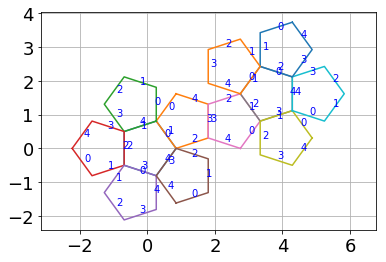

In [25]:
dodecanet.fold(reverse=True)
dodecanet.plot()

# L'icosaèdre

Voici une construction naive de l'icosahèdre ou l'on explicite chaque duplication de triangle équilatéral.

In [26]:
icosanet = pn.PlanarNet(N=3,l=1)
alpha = np.pi-np.arccos(-np.sqrt(5)/3)
icosanet.replicate(iedge=2, angle = alpha)
icosanet.replicate(iface=1,iedge=0, angle = alpha)
icosanet.replicate(iface=0,iedge=1, angle = alpha)
icosanet.replicate(iface=1,iedge=2, angle = alpha)
icosanet.replicate(iface=4,iedge=1, angle = alpha)
icosanet.replicate(iface=4,iedge=2, angle = alpha)
icosanet.replicate(iface=6,iedge=0, angle = alpha)
icosanet.replicate(iface=6,iedge=2, angle = alpha)
icosanet.replicate(iface=8,iedge=1, angle = alpha)
icosanet.replicate(iface=8,iedge=2, angle = alpha)
icosanet.replicate(iface=10,iedge=0, angle = alpha)
icosanet.replicate(iface=10,iedge=2, angle = alpha)
icosanet.replicate(iface=12,iedge=1, angle = alpha)
icosanet.replicate(iface=12,iedge=2, angle = alpha)
icosanet.replicate(iface=14,iedge=0, angle = alpha)
icosanet.replicate(iface=14,iedge=2, angle = alpha)
icosanet.replicate(iface=16,iedge=1, angle = alpha)
icosanet.replicate(iface=16,iedge=2, angle = alpha)
icosanet.replicate(iface=18,iedge=0, angle = alpha)

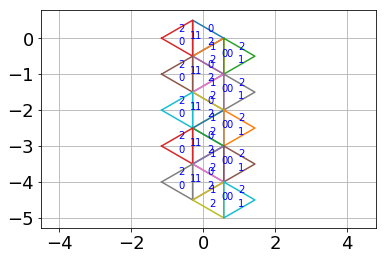

In [27]:
icosanet.plot()

In [28]:
s = icosanet.fold()

V 12
E 30
F 20
Euler check (2): V-E+F : 2
closed shape


In [29]:
j = jupyter_renderer.JupyterRenderer()
j.DisplayShape(s.shape,update=True)

# [Le Ballon de foot](https://en.wikipedia.org/wiki/Truncated_icosahedron)

Nous allons utiliser planarnet pour construire un ballon de football et pour réaliser sa représentation 3D avec ccad.

On commence par créer un PlanarNet basé sur un hexagone (N=6) et de côté unitaire l=1

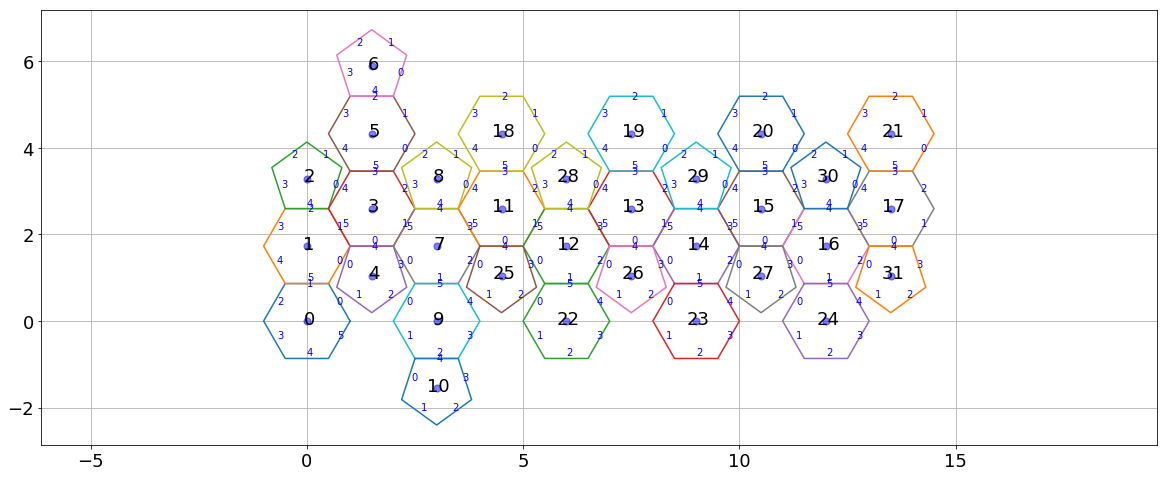

In [30]:
plt.figure(figsize=(20,8))
alpha=(180-138.189685)*np.pi/180.
beta=(180-142.62)*np.pi/180.
ball = pn.PlanarNet(N=6,l=1)
ball.expand(0,1,6,angle=alpha)
ball.expand(1,2,5,angle=beta)
ball.expand(1,1,6,angle=alpha)
ball.expand(3,0,5,angle=beta)
ball.expand(3,3,6,angle=alpha)
ball.expand(5,2,5,angle=beta)
ball.expand(3,1,6,angle=alpha)
ball.expand(7,4,5,angle=beta)
ball.expand(7,1,6,angle=alpha)
ball.expand(9,2,5,angle=beta)
ball.expand(7,3,6,angle=alpha)
ball.expand(11,1,6,angle=alpha)
ball.expand(12,3,6,angle=alpha)
ball.expand(13,1,6,angle=alpha)
ball.expand(14,3,6,angle=alpha)
ball.expand(15,1,6,angle=alpha)
ball.expand(16,3,6,angle=alpha)
ball.expand(11,3,6,angle=alpha)
ball.expand(13,3,6,angle=alpha)
ball.expand(15,3,6,angle=alpha)
ball.expand(17,3,6,angle=alpha)
ball.expand(12,1,6,angle=alpha)
ball.expand(14,1,6,angle=alpha)
ball.expand(16,1,6,angle=alpha)
ball.expand(11,0,5,angle=beta)
ball.expand(13,0,5,angle=beta)
ball.expand(15,0,5,angle=beta)
ball.expand(12,4,5,angle=beta)
ball.expand(14,4,5,angle=beta)
ball.expand(16,4,5,angle=beta)
ball.expand(17,0,5,angle=beta)
ball.plot(bnodes=1,blabels=1)

In [32]:
asolid = ball.fold()

V 118
E 149
F 32
Euler check (2): V-E+F : 1
open shape


In [33]:
asolid.fix(min_tolerance=1e-1)

In [34]:
ball.edges()

EdgeView([(0, 1), (1, 2), (1, 3), (3, 4), (3, 5), (3, 7), (5, 6), (7, 8), (7, 9), (7, 11), (9, 10), (11, 12), (11, 18), (11, 25), (12, 13), (12, 22), (12, 28), (13, 14), (13, 19), (13, 26), (14, 15), (14, 23), (14, 29), (15, 16), (15, 20), (15, 27), (16, 17), (16, 24), (16, 30), (17, 21), (17, 31)])

In [35]:
vertices = asolid.subshapes('Vertex')

In [36]:
len(vertices)

118

In [37]:
p1 = pc.PointCloud()

In [38]:
p1 = p1.from_solid(asolid)

In [39]:
p1

PointCloud : 118 points

In [40]:
p1.sorting()

In [41]:
p1.ordering()

In [42]:
asolid=cm.translated(asolid,-np.array(asolid.center()))

TypeError: 

In [43]:
asolid.center()

(-0.03150026327712453, 0.004970640825353106, -0.9698671661172114)

In [44]:
p1 = pc.PointCloud()
p1 = p1.from_solid(asolid)

In [45]:
p1

PointCloud : 118 points

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.Axes3DSubplot at 0x7f7822af7240>)

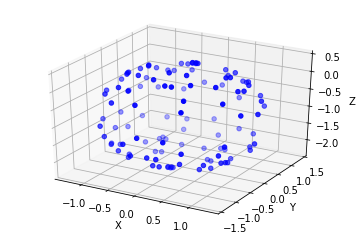

In [46]:
p1.show()

In [47]:
p1.ordering()

In [48]:
p1.sorting()

In [49]:
p1.p

array([[-1.31481481e+00, -3.38569590e-01, -1.27505624e+00],
       [-1.30712016e+00,  2.26017183e-01, -1.34630987e+00],
       [-1.28649941e+00,  4.72782073e-01, -8.13405030e-01],
       [-1.27465326e+00, -2.56570754e-01, -4.71324809e-01],
       [-1.22473709e+00,  1.44183592e-01, -3.22699432e-01],
       [-1.22222222e+00, -1.06916714e-01, -1.62569670e+00],
       [-1.19168824e+00,  6.92724534e-01, -7.74566070e-01],
       [-1.15485444e+00,  1.92039458e-01, -1.72119475e+00],
       [-1.10493826e+00,  5.92793804e-01, -1.57256937e+00],
       [-1.09259259e+00,  7.30597570e-01, -5.10022509e-01],
       [-1.07407408e+00, -6.34372504e-01, -3.50640465e-01],
       [-1.00000000e+00,  1.22464680e-16,  0.00000000e+00],
       [-1.00000000e+00,  9.62250446e-01, -8.60662966e-01],
       [-9.92891564e-01, -6.70447920e-02, -2.44935079e-02],
       [-9.63801270e-01, -9.99722608e-01, -1.06385866e+00],
       [-9.62962967e-01, -9.97889240e-02,  3.18764030e-02],
       [-9.54046645e-01, -6.80967080e-01

In [50]:
p1.dist

array([0.50917507, 0.51609524, 0.52041519, 0.53067275, 0.54070411,
       0.54710711, 0.56359907, 0.67078182, 0.68192417, 0.70519478,
       0.72349612, 0.74051146, 0.74902772, 0.75207379, 0.7546028 ,
       0.79349205, 0.80499331, 0.96864421, 0.99545396, 0.99834508,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.02036869, 1.04407598, 1.04472459, 1.04836552,
       1.06734914, 1.10956647, 1.11049365, 1.16327625, 1.17062819,
       1.19542897, 1.22413475, 1.2437532 , 1.25449623, 1.27322204,
       1.27471752, 1.28114151, 1.29576708, 1.29576709, 1.30893312,
       1.34511258, 1.36200314, 1.38300997, 1.40984196, 1.45296631,
       1.46301361, 1.53558611, 1.54345129, 1.58112009, 1.59381033,
       1.63299316, 1.63299316, 1.67878538, 1.68263951, 1.68874268,
       1.704911  , 1.74932942, 1.79505493, 1.84343766, 1.86256162,
       1.86378868, 1.8900257 , 1.89541356, 1.91580913, 1.93440735,
       1.9907192 , 1.99368027, 2.01128503, 2.0367003 , 2.03755

In [51]:
j = jupyter_renderer.JupyterRenderer()
j.DisplayShape(ball.shell.shape,update=True)

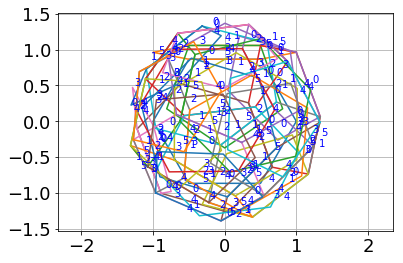

In [52]:
ball.plot(bnodes=0,blabels=0)

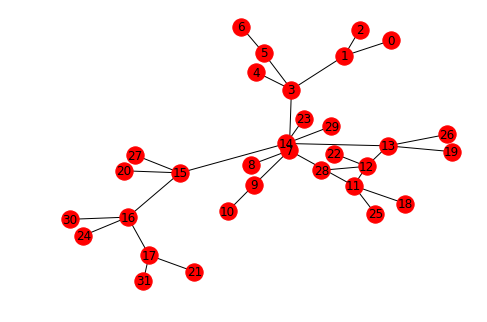

In [54]:
import networkx as nx
pos=nx.spring_layout(ball)
nx.draw(ball,pos)
lb=nx.draw_networkx_labels(ball,pos=pos)